In [ ]:
# Three Observations:
# Looking at the bar charts we can see that Capomulin and Ramicane has considerably 
# more mice in thier respective treatment groups. Also these two drugs had lower final tumor volumes compared
# to Infubinol and Ceftamin. Looking at line plot generated for mouse l509, we can see at day 20 there is a sudden 
# sharp decrease in Tumor Volume (mm3) and around day 25 there is a small increase followed by another sharp decline
# in tumor volume. The last observation is looking at the correlation of 0.84, meaning there is a positive correlation
# between tumor volume and weight. 
# 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
merged_mouse_study = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

In [3]:
# Display the data table for preview
merged_mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Check the number of mice.
len(merged_mouse_study)

1893

In [5]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_mouse_study.loc[merged_mouse_study.duplicated(subset = ["Mouse ID","Timepoint"])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = merged_mouse_study.loc[merged_mouse_study["Mouse ID"] == "g989",:]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
len(duplicate_mouse)

13

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropped_dups = merged_mouse_study.drop_duplicates(subset='Mouse ID')

In [9]:
Mouse_g989 = dropped_dups.loc[dropped_dups["Mouse ID"]=="g989",:]

In [10]:
clean_data = merged_mouse_study[merged_mouse_study ['Mouse ID'] != 'g989']
merged_mouse_study = clean_data
len(merged_mouse_study)

1880

In [11]:
dropped_dups = dropped_dups.drop([908])

In [12]:
# Check the number of mice in the clean DataFrame.
len(dropped_dups)

248

In [13]:
merged_mouse_study = clean_data.copy()

In [14]:
dropped_dups.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [15]:
# Summary Statistics

In [16]:
# Method 1:  Generate a summary statistics table of mean, median, variance,
# standard deviation, and SEM of the tumor volume for each regimen

mean = merged_mouse_study.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = merged_mouse_study.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = merged_mouse_study.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std_dev = merged_mouse_study.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = merged_mouse_study.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary_table = pd.DataFrame(mean)
summary_table2 = summary_table.rename(columns = {'Tumor Volume (mm3)': 'Mean'})
summary_table2["Median"]=median
summary_table2["Variance"]=variance
summary_table2['Standard Deviation']=std_dev
summary_table2['Standard Error of the Mean']=sem
summary_table2

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Method 2:  Generate a summary statistics table of mean, median, variance,
# standard deviation, and SEM of the tumor volume for each regimen

stats_df = merged_mouse_study.groupby('Drug Regimen')

stats_df.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [18]:
# Bar and Pie Chart

Text(0.5, 1.0, 'Total Number of Mice in each Treatment Regimen')

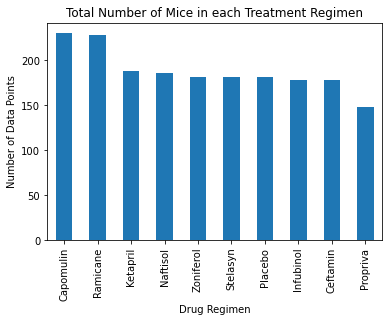

In [19]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment 
# regimen throughout the course of the study.

drug_groups = merged_mouse_study.groupby('Drug Regimen').count()['Mouse ID']
drug_groups = drug_groups.sort_values(ascending=False)
drug_groups_df = pd.DataFrame(drug_groups)

drug_groups_df.plot.bar(legend=False)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Total Number of Mice in each Treatment Regimen")

Text(0.5, 1.0, 'Total Number of Mice in each Treatment Regimen')

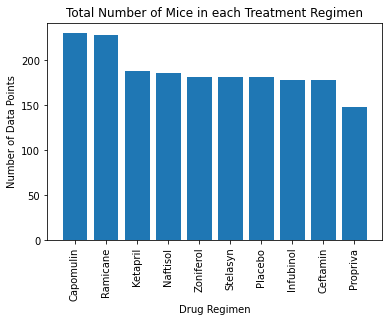

In [20]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment
# in each treatment regimen throughout the course of the study.

# Length of X axis
Drugs = np.arange(len(drug_groups))

# X axis tick marks 
ticks = [x for x in Drugs]

# Label of each tick on X axis
ticknames = drug_groups.reset_index()

# Bar Chart
plt.bar(Drugs, drug_groups_df['Mouse ID'])

# Formating to make it match
plt.xticks(ticks, ticknames['Drug Regimen'],rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Total Number of Mice in each Treatment Regimen")

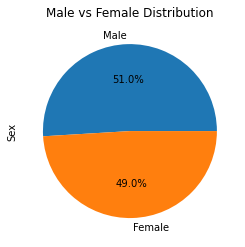

In [21]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice
sex_groups = merged_mouse_study["Sex"].value_counts()

sex_groups.plot(kind="pie", autopct="%1.1f%%",startangle=0, title = "Male vs Female Distribution")

Text(0.5, 1.0, 'Male vs Female Distribution')

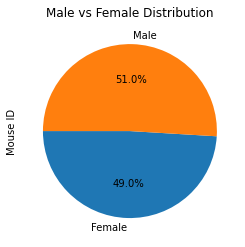

In [22]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice
sex_groups = merged_mouse_study.groupby('Sex').count()['Mouse ID']
panda_pie = sex_groups.plot.pie(autopct="%1.1f%%",startangle=180)
plt.title("Male vs Female Distribution")

In [23]:
#Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

capo_df = merged_mouse_study.loc[merged_mouse_study['Drug Regimen']== "Capomulin",:]
rami_df = merged_mouse_study.loc[merged_mouse_study['Drug Regimen']== "Ramicane",:]
infu_df = merged_mouse_study.loc[merged_mouse_study['Drug Regimen']== "Infubinol",:]
ceft_df = merged_mouse_study.loc[merged_mouse_study['Drug Regimen']== "Ceftamin",:]

four_drug_df = [capo_df, rami_df, infu_df, ceft_df]

# Start by getting the last (latest) timepoint for each mouse
last_tp_df = merged_mouse_study.groupby('Mouse ID').max()['Timepoint']
last_tp_df = pd.DataFrame(last_tp_df)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_tp_merged = pd.merge(last_tp_df, merged_mouse_study, on=("Mouse ID","Timepoint"),how='left')


In [25]:
# Put the four drug regimens into a list that can be iterated over in a for-loop 
# (and later used for plot labels)

four_drugs = ['Capomulin', 
              'Ramicane', 
              'Infubinol',
              'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Locate the rows which contain mice on each drug and get the tumor volumes
#merged_mouse_study.iterow(merged_mouse_study['Tumor'])
for drug in four_drugs:
    final_tumor_vol = last_tp_merged.loc[last_tp_merged['Drug Regimen']==drug, 'Tumor Volume (mm3)']
    tumor_vol.append(final_tumor_vol)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug_df in four_drug_df:
    quartiles = drug_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print (f'{drug}s potenital outliers: {outliers}')

Ceftamins potenital outliers: 3      62.999356
22     56.057749
88     61.849023
94     68.923185
106    67.748662
107    57.918381
110    59.851956
113    64.299830
134    59.741901
150    61.433892
154    64.192341
209    67.527482
228    64.634949
231    61.386660
238    68.594745
240    64.729837
Name: Tumor Volume (mm3), dtype: float64
Ceftamins potenital outliers: 3      62.999356
88     61.849023
94     68.923185
106    67.748662
107    57.918381
110    59.851956
113    64.299830
134    59.741901
150    61.433892
154    64.192341
209    67.527482
228    64.634949
231    61.386660
238    68.594745
240    64.729837
Name: Tumor Volume (mm3), dtype: float64
Ceftamins potenital outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamins potenital outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

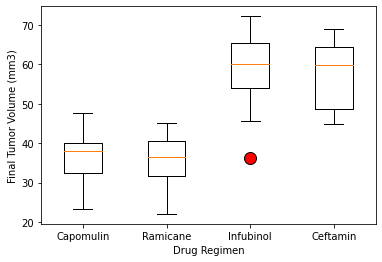

In [27]:
reddot = dict(markerfacecolor='red', markersize=12)

plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')

plt.boxplot(tumor_vol, labels=four_drugs, flierprops = reddot)
plt.show()

Text(0, 0.5, 'Tumor Volume (mm3)')

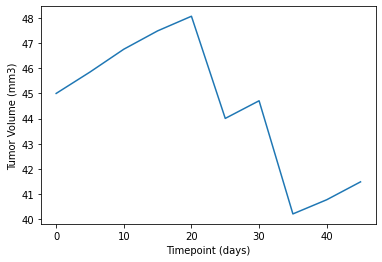

In [28]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_df = capo_df.loc[capo_df['Mouse ID'] == "l509"]

mouse_tp = line_df['Timepoint']
mouse_tv = line_df['Tumor Volume (mm3)']

plt.plot(mouse_tp, mouse_tv,)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
#plt.title('Capomulin Treatment of Mouse l509')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

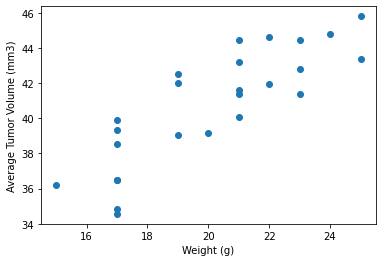

In [29]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
capo_avg_df = capo_df.groupby(['Mouse ID']).mean()
plt.scatter(capo_avg_df['Weight (g)'],capo_avg_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.
corr=round(st.pearsonr(capo_avg_df['Weight (g)'],capo_avg_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [32]:
line_regress_model = st.linregress(capo_avg_df['Weight (g)'],capo_avg_df['Tumor Volume (mm3)'])
line_regress_model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

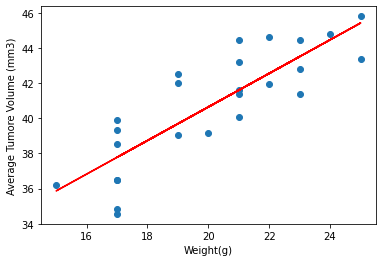

In [33]:
mslope = 0.9544396890241045
bintercept = 21.552160532685015

y_value = capo_avg_df['Weight (g)']* mslope + bintercept
plt.scatter(capo_avg_df['Weight (g)'],capo_avg_df['Tumor Volume (mm3)'])
plt.plot(capo_avg_df['Weight (g)'],y_value,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.show()